In [44]:
# Import de toutes les librairies nécessaires
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Challenge du titanic

Bienvenue au challenge du Titanic dans l'école d'été IA de Sorbonne Université, et du Campus des Métiers et des Qualifications.

Le dataset du titanic est un jeu de donnée très populaire afin de s'introduire à la science des données et à l'intelligence artificielle.

## Objectif principal

L'objectif de ce challenge est de prédire au mieux, basé sur un jeu de donnée existant, si un passager du Titanic a survécu ou non, dépendemment de paramètres spécifiques.

## 7 sous-objectifs à suivre pour nous guider

1. **Classifier**
Comprendre quelles sont les classes dont nous parlons? Exemple: L'age du passager, si il a survécu, son nom etc...

2. **Corréler**
Trouver une [corrélation]("https://www.nagwa.com/fr/explainers/968148323758/#:~:text=La%20corr%C3%A9lation%20d%C3%A9crit%20le%20lien%20entre%20deux%20variables.&text=Une%20corr%C3%A9lation%20positive%20signifie%20que,augmente%2C%20l'autre%20diminue."), un lien, entre deux variables.

3. **Convertir**
Afin de pouvoir nourrir le modèle IA, il faut dans certains cas transformer la donnée pour que le modèle la comprenne. Une transformation peut être simplement la conversion d'une variable numérique en variable textuelle.

4. **Complétion**
Des fois, il nous manque des données comme on va voir en dessous. Les modèles d'IA ont besoin de données complètes. Nous estimerons donc certaines des données manquantes.

5. **Corriger**
Des fois, la donnée n'est pas incomplète mais incorrecte. Nous pouvons détecter ces incohérences dans la donnée.

6. **Créer**
Pouvoir créer de nouveaux points de données grâce aux corrélations et aux prédictions que nous avons fait, avec le modèle de données entrainé.

7. **Visualiser**
Voir la donnée est la meilleure façon de comprendre



# Visualiser la donnée

En sciences de données, il est important de toujours visualiser ce que l'on manipule.

Nous allons en premier lieu, afficher la donnée que l'on a à disposition afin de mieux comprendre le problème posé.

In [45]:
# Ouverture des fichiers et lecture de la donnée à disposition

# Chemin d'accès du fichier de résultats de survie ou non
fichier_survie = 'data/gender_submission.csv'

# Lecture du fichier du sexe des personnes
dataframe_survie_personne = pd.read_csv('data/gender_submission.csv')
 
# Affichage des 5 premières lignes du fichier du sexe des personnes
print("Sexe des personnes")
print(dataframe_survie_personne.head())
print("---------------------------------------------")

# Chemin d'accès du fichier des données des personnes (train) (données d'entrainement)
fichier_donnees_personne_enrtainement = 'data/train.csv'

# Lecture du fichier des données des personnes (train) (données d'entrainement)
dataframe_donnees_entrainement = pd.read_csv('data/train.csv')

# Affichage des 5 premières lignes du fichier des données des personnes (train) (données d'entrainement)
print("Données d'entrainement")
print(dataframe_donnees_entrainement.head())
print("---------------------------------------------")

# Chemin d'accès du fichier des données des personnes (test)
fichier_donnees_personne_test = 'data/test.csv'

# Lecture du fichier des données des personnes (test)
dataframe_donnees_test = pd.read_csv('data/test.csv')

# Affichage des 5 premières lignes du fichier des données des personnes (test)
print("Données de test")
print(dataframe_donnees_test.head())

# Création d'une liste de données de test et d'entrainement
combinaison = [dataframe_donnees_entrainement, dataframe_donnees_test]


Sexe des personnes
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
---------------------------------------------
Données d'entrainement
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   

In [46]:
# Visualiser les colonnes du fichier des données des personnes (train) (données d'entrainement)
print("Colonnes du fichier des données des personnes (train) (données d'entrainement):")
print(dataframe_donnees_entrainement.columns.values)

Colonnes du fichier des données des personnes (train) (données d'entrainement):
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## Catégorie vs numérique?
Identifiez quelle colonne est catégorique, et quelle colonne est un nombre. 

Par exemple: `Sex` est catégorique, `Age` est numérique

## Description des données

Afin d'avoir le plus de contexte possible, pandas nous donne deux fonctions utiles:

1. `info()` nous permet de visualiser le type 
2. `describe()` nous permet de visualiser la distribution normale de chaque colonne.

In [47]:
# Infos sur le fichier des données d'entrainement
dataframe_donnees_entrainement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
# Description de la distribution des données d'entrainement de type numériques
dataframe_donnees_entrainement.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
# Description de la distribution des données d'entrainement pour les colonnes de type catégoriel
dataframe_donnees_entrainement.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Quelles sont nos hypothèses quand nous voyons ces informations?

Il est temps de regarder certains corrélations possibles. Identifier les corrélations va nous permettre de choisir les bonnes classes de données à inclure dans notre modèle.

**Quelles sont les colonnes qui ont l'air corrélées à la survie ou non d'un passager?**
En d'autres termes, quelle caractéristique a l'air d'augmenter ou de diminuer la chance de survie d'un passager?

Choisissez les colonnes que vous pensez être les plus utiles.

Quand c'est fait, passez à la suite.

## Pivotons la donnée
Pour cela, nous allons confronter chaque classe de donnée à la donnée survie.

In [50]:
# Confronter la survie des personnes par la classe du billet
dataframe_donnees_entrainement[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [51]:
# Confronter la survie des personnes par le sexe
dataframe_donnees_entrainement[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [52]:
# Confronter la survie des personnes par le nombre de frères et soeurs ou de conjoints
dataframe_donnees_entrainement[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [53]:
# Confronter la survie des personnes par le nombre de parents ou d'enfants
dataframe_donnees_entrainement[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Que disent ces tableaux?

Qu'a t'on appris avec les tableaux au dessus? Quelle donnée a l'air d'être importante?

# Emettre des hypothèses
Il faut que vous émettiez des hypothèses sur quelle donnée peut être importante.

Pensez vous que le prix du billet est important dans les chances de survie?

# Trouver les corrélations

Quelle est la meilleure manière de trouver ces corrélations? Visualiser!
Nous allons produire des graphes pour nous aider à comprendre les liens de nos données que nous avons confronté précedemment.

1. Corréler les valeurs numériques
2. Corréler les valeurs catégoriques

# Corréler les valeurs numériques

Quelles sont les valeurs numériques? Quelles sont celles que nous considérons importantes?

# Histogramme: age vs Survived

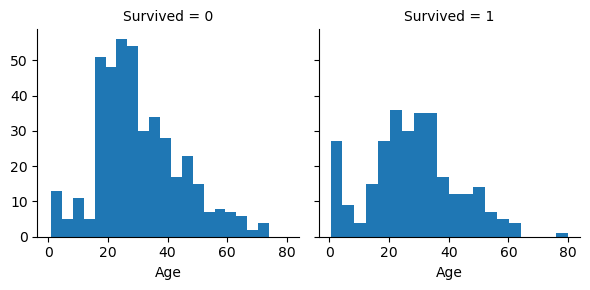

In [54]:
g = sns.FacetGrid(dataframe_donnees_entrainement, col='Survived')
g.map(plt.hist, 'Age', bins=20)

# Histogramme: Pclass vs Survived

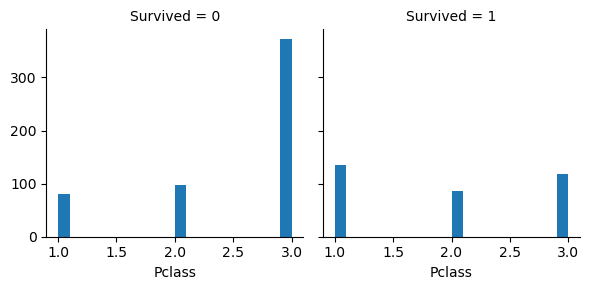

In [55]:
g = sns.FacetGrid(dataframe_donnees_entrainement, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)

# Croisement entre valeurs numériques et catégoriques

Ici nous regardons le nombre de passagers qui ont survécu ou non, classifiés par classe de billet et par leur age.

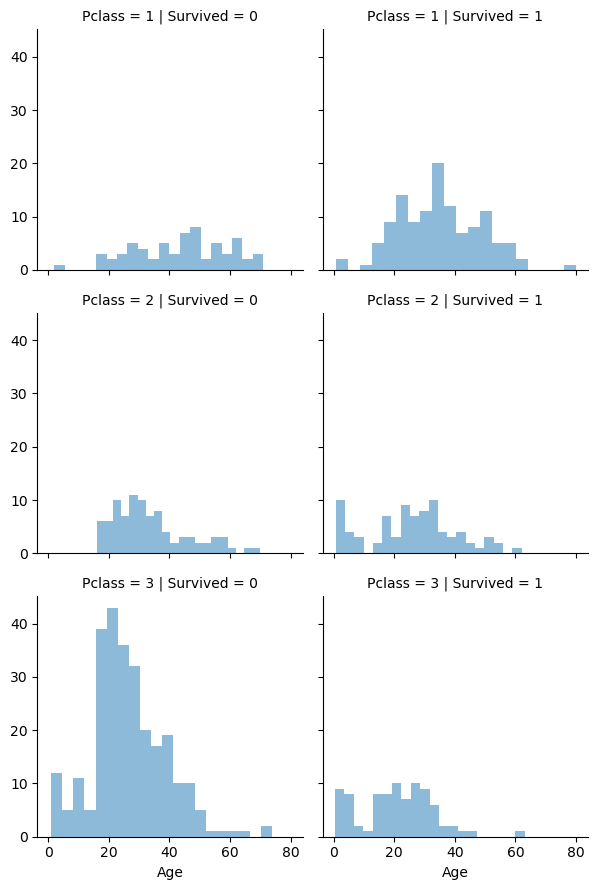

In [56]:
grid = sns.FacetGrid(dataframe_donnees_entrainement, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

On peut observer que le nombre de survivant a l'air plus haut en class 3 et dans les âges compris entre 20 et 40.

# Corréler les valeurs catégoriques avec Survived

Regardons l'impact du Sex sur Survived. Ce graphe montre la chance de survie dépendemment du sexe, de la classe dans chaque catégorie de port d'embarcation.

/Users/gautiermarechal/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/gautiermarechal/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


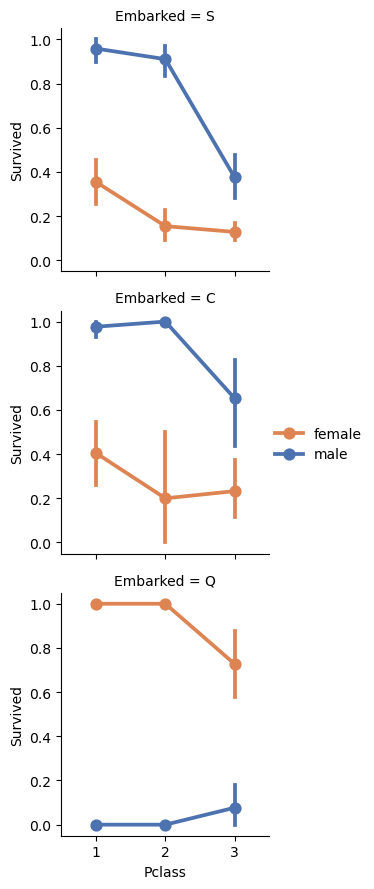

In [57]:
grid = sns.FacetGrid(dataframe_donnees_entrainement, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

## Observations
Le sexe et la classe semblent être des dnnées importantes de chance de survie.
En effet les femmes en classe 3 ont la chance la plus grande de survie.

# Vérifions si le port d'embarcation est une valeur importante

/Users/gautiermarechal/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/gautiermarechal/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/gautiermarechal/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/gautiermarechal/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/gautiermarechal/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecat

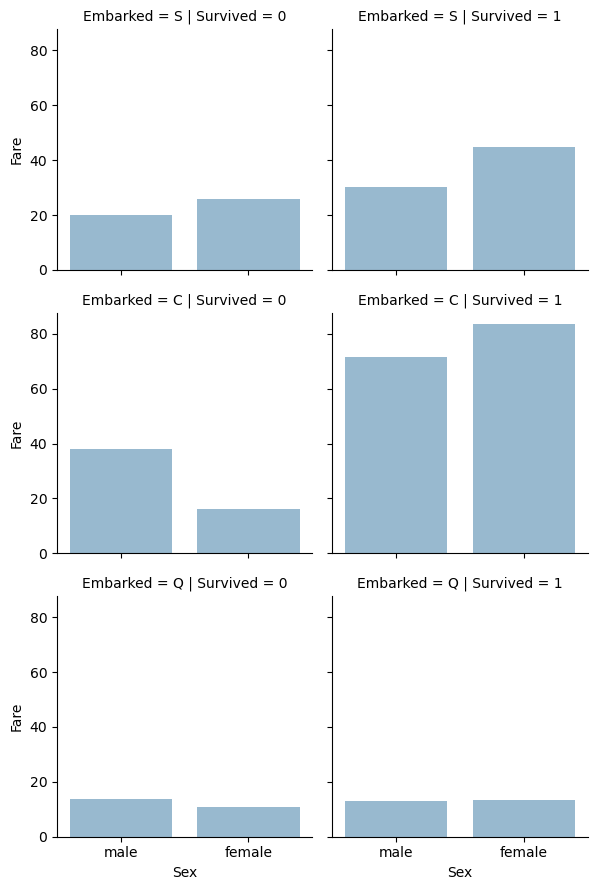

In [58]:
grid = sns.FacetGrid(dataframe_donnees_entrainement, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Observations
On observe que les prix côté Survie sont plus hauts et que le port d'embarcation sont corrélés avec le taux de survie

# Conclusion de l'analyse de donnée

Nous avons trouvé des corrélations entre le taux de Survie et les données suivantes:

- `Age`
- `Sex`
- `Embarked`
- `Pclass`

# Préparation des données pour le modèle de prédiction

Les actions possibles:

1. Enlever la donnée inutile
2. Créer des nouvelles features. Exemple: Extraire les titres des passagers 
3. Compléter de la donnée incomplète



In [59]:
print("Before", dataframe_donnees_entrainement.shape, dataframe_donnees_test.shape, combinaison[0].shape, combinaison[1].shape)

dataframe_donnees_entrainement = dataframe_donnees_entrainement.drop(['Ticket', 'Cabin'], axis=1)
dataframe_donnees_test = dataframe_donnees_test.drop(['Ticket', 'Cabin'], axis=1)
combine = [dataframe_donnees_entrainement, dataframe_donnees_test]

"After", dataframe_donnees_entrainement.shape, dataframe_donnees_test.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))